# 🔥포스🔥

### 위 게시글을 시리즈물📖입니다.  
**[1편. OpenCV의 기초, Numpy와 Matplotlib](https://dacon.io/codeshare/4768?page=1&dtype=recent)**

* 안녕하세요 :) 데이크루 2기 *포스팀*입니다!
* 오늘부터 본격적으로 cv2 패키지를 이용하여 OpenCV를 공부해볼 것입니다 :)
* 많은 기능들이 있는데요, 함께 공부해봅시다!!

* **파이썬으로 만드는 OpenCV 프로젝트(이세우 저)를 기반으로 제작하였습니다.**

## 시작하기 앞서, 
### 1) 이미지 다운 - https://blog.naver.com/soodagnu/222705048186

* 위 블로그에서 img 폴더 안에 이미지를 다운받으세요.

### 2) 폴더 순서

* 이미지 폴더(img)를 다음과 같은 순서로 두고 실습을 진행해주세요.

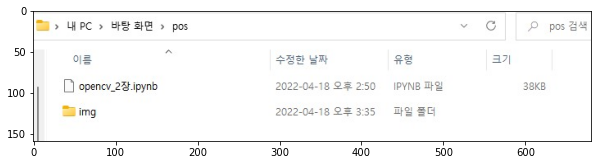

In [13]:
import matplotlib.pyplot as plt
import cv2

plt.figure(figsize=(10,10))
plt.imshow(cv2.imread('folder.jpg')[:,:,::-1])

## 그럼  시작합니다 :)

### **1. 이미지 입출력**

OpenCV를 이용한 대부분의 작업은 파일로 된 이미지를 읽어서 적절한 연산을 적용하고 그 결과를 화면에 표시하거나 다른 파일로 저장하는 것입니다.

이미지 파일이나 영상 파일을 읽고 화면에 표시하고 저장하는 방법을 중점적으로 알아보겠습니다.


#### **1-1. 이미지 읽기**

OpenCV를 사용해서 이미지를 읽고 화면에 표시하는 가장 간단한 코드는 아래와 같습니다.

- **cv2.imread()** : 파일 읽기 함수
- **cv2.imshow()** : 화면 표시 함수
(Google Colab에서는 cv2_imshow() 사용)

- **cv2.waitkey()** : 키보드 입력이 있을 때까지 대기
- **cv2.destroyAllWindows()** : 창 모두 닫기

In [ ]:
import cv2

img_file = "../img/img.jpg" # 표시할 이미지 경로            
img = cv2.imread(img_file)  # 이미지를 읽어서 img 변수에 할당

if img is not None:
    cv2.imshow('IMG', img)   # 읽은 이미지를 화면에 표시      
    cv2.waitKey()           # 키가 입력될 때 까지 대기      
    cv2.destroyAllWindows()  # 창 모두 닫기            

표시할 이미지의 경로를 지정해준 다음 읽은 이미지를 **cv2.imshow()** 함수를 통해 화면에 표시합니다. **cv2.waitKey()** 함수를 이용하여 아무 키보드를 입력하면 **cv2.destroyAllWindow()** 함수를 통해 창을 모두 닫을 수 있습니다.

* **원래는 이렇게 나타내야 하지만, 데이콘 ipynb 파일 특성상 새 창은 첨부가 안되기 때문에 캡쳐본을 결과값으로 나타낼 것입니다.**

이번에는 회색 스케일로 화면에 표시해 봅시다.

In [ ]:
img_file = "../img/img.jpg" 
img = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)  #그레이 스케일로 읽기

if img is not None:
    cv2.imshow('IMG', img)
    cv2.waitKey()
    cv2.destroyAllWindows()

<img src ="https://drive.google.com/uc?export=view&id=1rhJ1W4BowA2hMmUwBmAah9Nayrr4nZfh">

이미지를 회색 스케일로 읽고 싶다면 cv2.IMREAD_GRAYSCALE 옵션을 이용하면 됩니다.

#### **1-2. 이미지 저장하기**

이미지를 읽어보았다면 다음은 저장하는 방법을 알아봅시다.

- **cv2.imwrite()** : 파일 저장 함수

In [ ]:
img_file = '../img/img.jpg'
save_file = '../img/img_gray.jpg'

img = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
cv2.imshow(img_file, img)
cv2.imwrite(save_file, img) #파일로 저장, 포맷은 확장에 따름
cv2.waitKey()
cv2.destroyAllWindows()

파일 관리자로 해당 경로를 살펴보면 그레이 스케일로 바뀐 새로운 파일이 저장된 것을 확인할 수 있습니다. 저장하는 이미지와 파일 포맷은 지정한 파일 이름의 확장자에 따라 알아서 바뀝니다.

### **2. 그림 그리기**

이미지나 비디오에 그림을 그리는 방법을 알아봅시다.

그리기 예제를 진행하기 위해서는 우선 그림판 역할을 할 이미지가 하나 필요합니다. 
아래의 코드를 통해 blank_500.jpg 라는 이름의 500 x 500 픽셀 크기의 하얀 이미지를 생성해봅시다.

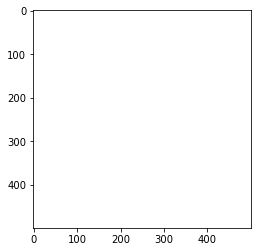

In [5]:
# 하얀 이미지 배경 생성
import cv2
import numpy as np
import matplotlib.pyplot as plt

img=np.full((500,500,3),255, dtype=np.uint8)
cv2.imwrite('../img/blank_500.jpg', img)
plt.imshow(cv2.imread('../img/blank_500.jpg')[:,:,::-1])

**2-1. 직선 그리기**

**cv2.line()** 함수를 이용하여 방금 생성한 이미지에 직선을 그릴 수 있습니다. 


- **cv2.line**(img, start, end, color [,thickness, lineType]) 
    - img : 그림 그릴 대상 이미지
    - start : 선 시작 지점 좌표
    - end : 선 끝 지점 좌표
    - color : 선 색상 (blue, green, red) 0~255
    - thickness : 선 두께
    - lineType : 선 그리기 형식(cv2.LINE_4, cv2.LINE_8, cv2.LINE_AA)

In [ ]:
img = cv2.imread('../img/blank_500.jpg')


cv2.line(img, (10, 100), (100, 10), (255,0,0))   # 파란색 1픽셀 선
cv2.line(img, (10, 130), (130, 10), (0,255,0))  # 초록색 1픽셀 선
cv2.line(img, (10, 160), (160, 10), (0,0,255))  # 빨간색 1픽셀 선

# 하늘색(파랑+초록) 10픽셀 선      
cv2.line(img, (10, 300), (300, 10), (255,255,0), 10)          
# 분홍(파랑+빨강) 10픽셀 선      
cv2.line(img, (10, 330), (330, 10), (255,0,255), 10)          
# 노랑(초록+빨강) 10픽셀 선      
cv2.line(img, (10, 360), (360, 10), (0,255,255), 10)          
# 회색(파랑+초록+빨강) 10픽셀 선  
cv2.line(img, (10, 390), (390, 10), (200,200,200), 10)        
# 검정 10픽셀 선    
cv2.line(img, (10, 420), (420, 10), (0,0,0), 10)                    

# 4연결 선
cv2.line(img, (100, 490), (490, 100), (0,0,255), 20, cv2.LINE_4)   
# 8연결 선
cv2.line(img, (150, 490), (490, 150), (0,0,255), 20, cv2.LINE_8)    
# 안티에일리어싱 선 
cv2.line(img, (200, 490), (490, 200), (0,0,255), 20, cv2.LINE_AA)   
                    

cv2.imshow('lines', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

* 아래 사진에서 20픽셀로 그려진 빨간색 선의 첫번째와 두번째는 사진 상으론 잘 보이지 않지만 결과를 출력해보면 픽셀이 깨져 보입니다. 이를 LINE_AA 옵션을 이용하여 계단 현상을 최소화 해줍니다.

* **그럼 안티에일리어싱 선(LINE_AA)이란?**<br>
선아니 도형의 가장자리가 우둘투둘하고 날카로워지는 형상을 해결하기 위한 기술로 선을 부드럽게 만드는 기술입니다.

<img src ="https://drive.google.com/uc?export=view&id=1U-8ezqjc8IxxWpuQlQk7MxqgCDywX26S">





#### **2-2. 사각형 그리기**

**cv2.rectangle()** 함수를 이용하여 사각형을 그릴 수 있습니다. 

cv2.line() 함수와 사용법이 거의 비슷하지만, 선의 두께의 속성인 thickness를 -1로 지정하면 면 채우기가 가능합니다. 사각형을 그리기 위한 좌표는 대각선으로 마주보는 두 꼭짓점의 좌표입니다.


- **cv2.rectangle**(img, start, end, color [,thickness, lineType]) 

In [ ]:
img = cv2.imread('../img/blank_500.jpg')

# 좌상, 우하 좌표로 사각형 그리기
cv2.rectangle(img, (100, 100), (400, 400), (255,0,0) )        
# 우하, 좌상 좌표로 사각형 그리기
cv2.rectangle(img, (350, 350), (150, 150), (0,255,0), 10 )  
# 우상, 좌하 좌표로 사각형 채워 그리기 
cv2.rectangle(img, (300, 200), (200, 300), (0,0,255), -1 )  

cv2.imshow('rectangle', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

<img src ="https://drive.google.com/uc?export=view&id=15turGdd1bWcRnZyeFhg-wdWTMmajR3IF">




#### **2-3. 다각형 그리기**

**cv2.polylines()** 함수를 이용하여 다각형을 그릴 수 있습니다. 

이 함수의 points 인자는 다각형을 그리기 위한 여러 개의 꼭짓점 좌표를 전달합니다. Numpy 배열 형식을 이용하여 좌표를 전달하는 특징이 있습니다.

isClosed가 True이면 첫 꼭짓점과 마지막 꼭짓점을 연결하여 닫힌 도형을 그리고 False이면 단순히 여러 꼭짓점을 잇는 선을 그립니다.


- **cv2.polylines**(img, points, inClosed, color [,thickness, lineType]) 

In [ ]:
img = cv2.imread('../img/blank_500.jpg')

# Numpy array로 좌표 생성 
# 번개 모양 선 좌표
pts1 = np.array([[50,50], [150,150], [100,140],[200,240]], dtype=np.int32) 
# 사각형 좌표
pts2 = np.array([[300,50], [300,150], [400,150],[400,50]], dtype=np.int32) 
# 사각형 좌표
pts3 = np.array([[100,300], [100,400], [200,400],[200,300]], dtype=np.int32) 
# 오각형 좌표
pts4 = np.array([[350,250], [450,350], [400,450], [300,450], [250,350]], dtype=np.int32) 

# 다각형 그리기 
cv2.polylines(img, [pts1], False, (255,0,0))       # 번개 모양 선 그리기
cv2.polylines(img, [pts2], False, (0,0,0), 10)     # 사각형 열린 선 그리기
cv2.polylines(img, [pts3], True, (0,0,255), 10)    # 사각형 닫힌 도형 그리기
cv2.polylines(img, [pts4], True, (0,0,0))          # 오각형 닫힌 도형 그리기

cv2.imshow('polyline', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

<img src ="https://drive.google.com/uc?export=view&id=1E4IzQxotEDFXKYHr7yNtGWorGe1iVSWx">

#### **2-4. 원, 타원, 호 그리기**


완전한 원을 그릴 때는 **cv2.circle()** 함수를 이용하는 것이 유용합니다. . 



- **cv2.circle**(img, center, redius, color [,thickness, lineType]) : 원 그리기 함수


In [ ]:
img = cv2.imread('../img/blank_500.jpg')

# 원점(250,250), 반지름 200 
cv2.circle(img, (250, 250), 200, (255,0,0))     
# 원점(250,250), 반지름 100 
cv2.circle(img, (250, 250), 100, (0,255,0), 5)   
# 원점(250,250), 반지름 50, 채우기 
cv2.circle(img, (250, 250), 50, (0,0,255), -1)  

cv2.imshow('circle', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

<img src ="https://drive.google.com/uc?export=view&id=1jw09vTQ63lpQWj_oBvvrCjF2GtBmpaRu">

호나 타원을 그리려면 **cv2.ellipse()** 함수를 써야합니다

**cv2.ellipse()** 함수를 이용하여 표시할 호의 시작과 끝 각을 0, 180으로 지정하면 원의 아랫부분, 181, 360이면 원의 윗부분에 해당하는 반원을 그릴 수 있습니다.

- **cv2.ellipse**(img, center, axes, angle, from, to, color [,thickness, lineType]) : 원 그리기 함수

In [ ]:
img = cv2.imread('../img/blank_500.jpg')

# 원점(50,70), 반지름(50), 회전 0, 0도 부터 360도 그리기 
cv2.ellipse(img, (50, 70), (50, 50), 0, 0, 360, (0,0,255))    
# 원점(150, 70), 아래 반원 그리기 
cv2.ellipse(img, (150, 70), (50, 50), 0, 0, 180, (255,0,0))    
#원점(200, 70), 윗 반원 그리기 
cv2.ellipse(img, (200, 70), (50, 50), 0, 181, 360, (0,0,255))    

# 원점(320, 70), 반지름(70,50) 납작한 타원 그리기 
cv2.ellipse(img, (320, 70), (70, 50), 0, 0, 360, (0,255,0))    
# 원점(440,70), 반지름(50,70) 홀쭉한 타원 그리기 
cv2.ellipse(img, (440, 70), (50, 70), 0, 0, 360, (255,0,255))    

# 원점(60, 200), 반지름(50,70), 회전 30도 
cv2.ellipse(img, (60, 200), (50, 70), 30, 0, 360, (0,0,0))    
# 원점(200,200), 반지름(50,70), 회전 330도 
cv2.ellipse(img, (180, 200), (50, 70), 330, 0, 360, (0,0,0))    

# 원점(320,200), 홀쭉한 타원 45도 회전 후 아랫 반원 그리기 
cv2.ellipse(img, (320, 200), (50, 70), 45, 0, 180, (0,0,255))    
# 원점(350,200), 홀쭉한 타원 45도 회전 후 윗 반원 그리기 
cv2.ellipse(img, (350, 200), (50, 70), 45, 181, 360, (255,0,0))    

cv2.imshow('ellipse', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

<img src ="https://drive.google.com/uc?export=view&id=17kca6Nht6jDMPQ-Tz_DIRP0j0utUMaVQ">


#### **2-5. 글씨 그리기**


**cv2.putText()** 함수로 문자열을 표시할 수 있습니다.

이때 fontSize인자는 글꼴을 의미합니다. 글꼴 종류는 다음과 같습니다.

1. cv2.FONT_HERSHEY_PLAIN : 산세리프체 작은 글꼴
2. cv2.FONT_HERSHEY_SIMPLE : 산세리프체 일반 글꼴
3. cv2.FONT_HERSHEY_DDUPLEX : 산세리프체 진한 글꼴
4. cv2.FONT_HERSHEY_COMPLEX_SMALL : 세리프체 작은 글꼴
5. cv2.FONT_HERSHEY_COMPLEX : 세리프체 일반 글꼴
6. cv2.FONT_HERSHEY_TRIPLEX : 세리프체 진한 글꼴
7. cv2.FONT_HERSHEY_SCRIPT_SIMPLEX : 필기체 산세리프 글꼴
8. cv2.FONT_HERSHEY_SCRIPT_COMPLEX : 필기체 세리프 글꼴
9. cv2.FONT_ITALIC : 이탤릭체 플래그


- **cv2.putText**(img, text, point, fontFace, fontSize, color [,thickness, lineType]) 


In [ ]:
img = cv2.imread('../img/blank_500.jpg')

# sans-serif small
cv2.putText(img, "Plain", (50, 30), cv2.FONT_HERSHEY_PLAIN, 1, (0, 0,0))            
# sans-serif normal
cv2.putText(img, "Simplex", (50, 70), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0,0))        
# sans-serif bold
cv2.putText(img, "Duplex", (50, 110), cv2.FONT_HERSHEY_DUPLEX, 1, (0, 0,0))         
# sans-serif normall X2  
cv2.putText(img, "Simplex", (200, 110), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,250)) 

# serif small
cv2.putText(img, "Complex Small", (50, 180), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 0,0))   
# serif normal
cv2.putText(img, "Complex", (50, 220), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0,0))
# serif bold
cv2.putText(img, "Triplex", (50, 260), cv2.FONT_HERSHEY_TRIPLEX, 1, (0, 0,0))               
# serif normal X2  
cv2.putText(img, "Complex", (200, 260), cv2.FONT_HERSHEY_TRIPLEX, 2, (0,0,255))               

# hand-wringing sans-serif
cv2.putText(img, "Script Simplex", (50, 330), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1, (0, 0,0)) 
# hand-wringing serif
cv2.putText(img, "Script Complex", (50, 370), cv2.FONT_HERSHEY_SCRIPT_COMPLEX, 1, (0, 0,0)) 

# sans-serif + italic 
cv2.putText(img, "Plain Italic", (50, 430), cv2.FONT_HERSHEY_PLAIN | cv2.FONT_ITALIC, 1, (0, 0,0)) 
# sarif + italic
cv2.putText(img, "Complex Italic", (50, 470), cv2.FONT_HERSHEY_COMPLEX | cv2.FONT_ITALIC, 1, (0, 0,0)) 

cv2.imshow('draw text', img)
cv2.waitKey()
cv2.destroyAllWindows()

<img src ="https://drive.google.com/uc?export=view&id=1Wf5Qba0WPvKs_1NmxCB1EvcGAjJYhiwu">

### **3. 창 관리**

한 개 이상의 이미지를 여러 창에 띄우거나 각 창에 키보드와 마우스 이벤트를 처리하려면 창을 관리하는 기능이 필요합니다. OpenCV가 제공하는 창 관리 관련 API들을 알아봅시다.

- **cv2.nameWindow**(title [,option]) : 이름 갖는 창 열기
    - cv2.WINDOW_NORMAL : 임의의 크기, 사용자 창 크기 조정 가능
    - cv2.WINDOW_AUTOSIZE : 이미지와 같은 크기, 창 크기 재조정 불가능
- **cv2.moveWindow**(title, x, y) : 창 위치 이동
- **cv2.resizeWindow**(title, width, height) : 창 크기 변경
- **cv2.destroyWindow**(title) : 창 닫기
- **cv2.destroyAllWindows()** : 열린 모든 창 닫기

위의 API를 사용하여 cv2.WINDOW_NORMAL과 cv2.WINDOW_AUTOSIZE 속성에 대해 살펴보겠습니다.

In [ ]:
file_path = '../img/img.jpg'
img = cv2.imread(file_path)                            # 이미지를 기본 값으로 읽기
img_gray = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE) # 이미지를 그레이 스케일로 읽기

cv2.namedWindow('origin', cv2.WINDOW_AUTOSIZE)          # origin 이름으로 창 생성
cv2.namedWindow('gray', cv2.WINDOW_NORMAL)              # gray 이름으로 창 생성
cv2.imshow('origin', img)                               # origin 창에 이미지 표시
cv2.imshow('gray', img_gray)                            # gray 창에 이미지 표시

cv2.moveWindow('origin', 0, 0)                          # 창 위치 변경
cv2.moveWindow('gray', 100, 100)                        # 창 위치 변경

cv2.waitKey(0)                                          # 아무키나 누르면
cv2.resizeWindow('origin', 200, 200)                    # 창 크기 변경 (변경 안됨)
cv2.resizeWindow('gray', 100, 100)                      # 창 크기 변경 (변경 됨)

cv2.waitKey(0)                                          # 아무키나 누르면
cv2.destroyWindow("gray")                               # gray 창 닫기

cv2.waitKey(0)                                          # 아무키나 누르면
cv2.destroyAllWindows()                                 # 모든 창 닫기

<img src ="https://drive.google.com/uc?export=view&id=1ICoOWHB29g-mJtsuD1DBGutQZumr76Ng">

위의 코드를 실행하면 처음에 'origin'과 'gray'라는 2개의 창을 띄워 원본 이미지와 그레이 스케일 이미지를 각각 보여줍니다.
'origin' 창은 cv2.WINDOW_AUTOSIZE 창으로 열었기 때문에 이미지와 같은 크기로 보여주고 'gray'창은 cv2.WINDOW_NORMAL 창으로 열었기 때문에 임의의 크기로 보여주고 있습니다.

아무 키나 눌렸을 때, 'origin' 창은 cv2.WINDOW_AUTOSIZE 창이므로 창 크기가 변경되지 않고 위의 결과를 보듯이 'origin'의 하단 부분이 잘려 화면 상에 보여지지 않습니다. 'gray'창은 cv2.WINDOW_NORMAL 창이므로 창 크기 변경이 가능하여 이미지의 모든 부분을 볼 수 있습니다..

### **4. 이벤트 처리**

다음은 키보드 이벤트, 마우스 이벤트, 트랙바에 대해 알아보겠습니다.



#### **4-1. 키보드 이벤트**

키보드에서 어떤 키를 눌렀는지 알아내려면 **cv2.waitKey()** 함수의 반환 값을 출력해 보면 됩니다.

지정한 시간까지 키보드 입력이 없으면 -1을 반환합니다.
입력된 키를 특정 문자와 비교할 때는 ord() 함수를 사용하면 편리합니다.

In [ ]:
img_file = "../img/img.jpg" 
img = cv2.imread(img_file) 
title = 'IMG'                   # 창 이름 
x, y = 100, 100                 # 최초 좌표

while True:
    cv2.imshow(title, img)
    cv2.moveWindow(title, x, y)
    key = cv2.waitKey(0) & 0xFF # 키보드 입력을 무한 대기, 8비트 마스크처리
    print(key, chr(key))        # 키보드 입력 값,  문자 값 출력
    if key == ord('a'):         # 'a' 키 이면 좌로 이동
        x -= 30
    elif key == ord('s'):       # 's' 키 이면 아래로 이동
        y += 30
    elif key == ord('w'):       # 'w' 키 이면 위로 이동
        y -= 30
    elif key == ord('d'):       # 'd' 키 이면 오른쪽으로 이동
        x += 30
    elif key == ord('q') or key == 27: # 'q' 이거나 'esc' 이면 종료
        break
cv2.destroyAllWindows()

위의 코드를 실행하면 화면에 이미지를 표시하고 키보드의 'w', 's', 'a', 'd' 키를 누르면 창의 위치가 상, 하, 좌, 우 방향으로 30픽셀씩 움직입니다. 'q'키 또는 'esc'키를 누르면 종료됩니다.

#### **4-2. 마우스 이벤트**

- **MouseCallback**(event, x, y, flag, param) : 콜백 함수 선언부
- **cv2.setMouseCallback**(win_name, onMouse [, param]) : onMouse 함수를 등록


마우스에서 입력을 받으려면 이벤트를 처리할 함수를 미리 선언해 놓고 **cv2.setMouseCallback()** 함수에 그 함수를 전달합니다. 

코드로 간단히 묘사하면 다음과 같습니다.

In [ ]:
def onMouse(event, x, y, flags, param): 
    # 여기에 마우스 이벤트에 맞게 해야할 작업을 작성합니다.
    pass

cv2.setMouseCallback('title', onMouse)

MouseCallback() 함수의 event인자는 마우스 이벤트 종류를 의미합니다. (총 12가지)
- cv2.EVENT_MOSEMOVE : 마우스 움직임
- cv2.EVENT_(L/R/M)BUTTONDOWN : 왼쪽/오른쪽/가운데 버튼 누름
- cv2.EVENT_(L/R/M)BUTTONUP : 왼쪽/오른쪽/가운데 버튼 뗌
- cv2.EVENT_(L/R/M)BUTTONDBCLK : 왼쪽/오른쪽/가운데 버튼 더블클릭
- cv2.EVENT_MOUSEWHELL : 휠 스크롤
- cv2.EVENT_MOUSEHWHELL : 휠 가로 스크롤

MouseCallback() 함수의 flags인자는 마우스 동작과 함께 일어난 상태를 의미합니다.(총 6가지)
- cv2.EVENT_FLAG_LBUTTON(1) : 왼쪽 버튼 누름 
- cv2.EVENT_FLAG_RBUTTON(2) : 오른쪽 버튼 누름
- cv2.EVENT_FLAG_MBUTTON(4) : 가운데 버튼 누름
- cv2.EVENT_FLAG_CTRKEY(8) : Ctrl키 누름
- cv2.EVENT_FLAG_SHIFTKEY(16) :Shift키 누름
- cv2.EVENT_FLAG_ALTKEY(32) : Alt키 누름



위의 마우스 이벤트 함수를 이용하여 마우스를 클릭하면 지름이 30픽셀인 동그라미를 그리는 예제를 실습해봅시다.

In [ ]:
title = 'mouse event'                   # 창 제목
img = cv2.imread('../img/blank_500.jpg') # 백색 이미지 읽기
cv2.imshow(title, img)                  # 백색 이미지 표시

def onMouse(event, x, y, flags, param): # 마우스 콜백 함수 구현 
    print(event, x, y, )                # 파라미터 출력
    if event == cv2.EVENT_LBUTTONDOWN:  # 왼쪽 버튼 누름인 경우 
        cv2.circle(img, (x,y), 30, (0,0,0), -1) # 지름 30 크기의 검은색 원을 해당 좌표에 그림
        cv2.imshow(title, img)          # 그려진 이미지를 다시 표시 

cv2.setMouseCallback(title, onMouse)    # 마우스 콜백 함수를 GUI 윈도우에 등록 

while True:
    if cv2.waitKey(0) & 0xFF == 27:     # esc로 종료
        break
cv2.destroyAllWindows()

<img src ="https://drive.google.com/uc?export=view&id=1ieND1TRnZSebj1bDrqqj2Sw7BQuWhcKD">

다음은 &(논리곱)이나 |(논리합) 연산을 사용하여 여러 가지 상태를 하나의 값을 나타내는 코드를 구현해 봅시다.

아래의 코드는 Ctrl 키를 누르고 클릭하면 빨간색 원, Shift 키를 누르고 클릭하면 파란색 원, Shift 키와 Ctrl 키를 누르고 클릭하면 초록색 원을 그리는 조건을 추가한 예제입니다.

In [ ]:
title = 'mouse event'                   # 창 제목
img = cv2.imread('../img/blank_500.jpg') # 백색 이미지 읽기
cv2.imshow(title, img)                  # 백색 이미지 표시

colors = {'black':(0,0,0),
         'red' : (0,0,255),
         'blue':(255,0,0),
         'green': (0,255,0) } # 색상 미리 정의

def onMouse(event, x, y, flags, param): # 마우스 콜백 함수 구현 
    print(event, x, y, flags)                # 파라미터 출력
    color = colors['black']
    if event == cv2.EVENT_LBUTTONDOWN:  # 왼쪽 버튼 누름인 경우 
        # 컨트롤키와 쉬프트 키를 모두 누른 경우
        if flags & cv2.EVENT_FLAG_CTRLKEY and flags & cv2.EVENT_FLAG_SHIFTKEY : 
            color = colors['green']
        elif flags & cv2.EVENT_FLAG_SHIFTKEY : # 쉬프트 키를 누른 경우
            color = colors['blue']
        elif flags & cv2.EVENT_FLAG_CTRLKEY : # 컨트롤 키를 누른 경우
            color = colors['red']
        # 지름 30 크기의 검은색 원을 해당 좌표에 그림
        cv2.circle(img, (x,y), 30, color, -1) 
        cv2.imshow(title, img)          # 그려진 이미지를 다시 표시

cv2.setMouseCallback(title, onMouse)    # 마우스 콜백 함수를 GUI 윈도우에 등록 

while True:
    if cv2.waitKey(0) & 0xFF == 27:     # esc로 종료
        break
cv2.destroyAllWindows()

<img src ="https://drive.google.com/uc?export=view&id=1PcVdroFzrrXA_-SkQ4EjE72gPFllzvOs">


#### **4-3. 트랙바**

- **cv2.createTrackbar()** : 트랙바 생성
- **cv2.getTrackbarPos()** : 트랙바 위치값

트랙바는 슬라이드 모양의 인터페이스를 마우스로 움직여서 값을 입력받는 GUI요소입니다. 마우스 이벤트 방식과 마찬가지로 트랙바를 움직였을 때 동작할 함수를 미리 준비해서 함께 전달합니다.

코드로 간단히 묘사하면 다음과 같습니다.

In [ ]:
def onChange(value) :
  v=cv2.getTrackbarPos('trackbar','win_name')

cv2.createTrackbar('trackbar','win_name',o,100,onChange)

직접 트랙바를 한 번 만들어봅시다.

In [ ]:
import cv2
import numpy as np

win_name = 'Trackbar'                                   # 창 이름

img = cv2.imread('../img/blank_500.jpg')
cv2.imshow(win_name,img)                                # 초기 이미지를 창에 표시

# 트랙바 이벤트 처리 함수 선언 
def onChange(x):                                        
    print(x)                                            # 트랙바 새로운 위치 값 
    # 'R', 'G', 'B' 각 트랙바 위치 값    
    r = cv2.getTrackbarPos('R',win_name)               
    g = cv2.getTrackbarPos('G',win_name)               
    b = cv2.getTrackbarPos('B',win_name)               
    print(r, g, b)
    img[:] = [b,g,r]                                    # 기존 이미지에 새로운 픽셀 값 적용 
    cv2.imshow(win_name, img)                           # 새 이미지 창에 표시

# 트랙바 생성   
cv2.createTrackbar('R', win_name, 255, 255, onChange)  
cv2.createTrackbar('G', win_name, 255, 255, onChange)
cv2.createTrackbar('B', win_name, 255, 255, onChange)

while True:
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()    

<img src ="https://drive.google.com/uc?export=view&id=1YjIh7Mp71Z5G9idup4CMLc4lHGfVAwnJ">

실행 결과, 처음에 완전히 흰색이었던 이미지에 트랙바를 움직여 0~255 사이의 값을 전달하면 새로운 색상을 적용할 수 있습니다.

### [마무리]

- 먼저, cv2패키지를 이용하여 이미지를 불러오는 방법에 대하여 살펴보았습니다.
- 그 다음, 이미지 위에 여러 도형, 선들을 그려보았습니다.
- 이를 활용하여 학습에 필요한 이미지들을 그려낼 수 있을 것 같습니다 :)
- 다음 시간에는 본격적인 OpenCV의 매력을 느끼실 수 있는 이미지 프로세싱 기초편을 가지고 오겠습니다!!
- 26일 오후 2시에 만나요 🔥✨

### 감사합니다.